## Plot (a) terminal electrolyzer cost (b) total system cost vs. CO2 electrolyzer cost

### IMPORT MODULES

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# update plot formatting
mpl.rcParams.update({'font.size': 14})
mpl.rcParams.update({'mathtext.default': 'rm'})
mpl.rcParams.update({'font.family': 'sans-serif'})
mpl.rcParams.update({'font.sans-serif': 'Calibri'})

### USER INPUT

In [3]:
# output folder to use for plots
folder = 'outputs 2024-08-13 electrolyzer cost'

In [4]:
# variable names to plot
x_var = 'CO2 electrolyzer purchase cost ($/m^2)'
y_var = 'total levelized cost of hydrogen ($/kg H2)'

### READ RESULTS: Costs by pathway, process, and function

In [5]:
# read csv
f = 'output_cost by process-function.csv'
df = pd.read_csv(
    os.path.join('..\outputs', folder, f), 
    index_col='run #'
    )

# extract baseline value of input parameter
x_var_base = df.loc[
    df['scenario'] == 'closed loop', 
    x_var
].values[0]

# filter for sensitivity cases
df = df.loc[df['scenario'].str.contains('sqm')]

# rename pathways
df['pathway'] = df['pathway'].str.replace('compressed', 'Compr.')
df['pathway'] = df['pathway'].str.replace('liquid', 'Liq.')

In [6]:
# extract output dollar year
output_dollar_year = df['output dollar year'].values[0]

output_dollar_year

2022

In [7]:
# keep used columns
df = df[[
    x_var, 
    'pathway', 
    'process', 
    'function', 
    y_var
]]

df

,CO2 electrolyzer purchase cost ($/m^2),pathway,process,function,total levelized cost of hydrogen ($/kg H2)
run #,,,,,
3,1000,LOHC - formic acid,preconditioning,pumping,0.000000
3,1000,LOHC - formic acid,preconditioning,storage,0.007101
3,1000,LOHC - formic acid,production,CO2 recycling,10.141291
3,1000,LOHC - formic acid,production,compression,0.000000
3,1000,LOHC - formic acid,production,pumping,0.000000
...,...,...,...,...,...
10,30000,Liq. hydrogen,production,purchase,0.310093
10,30000,Liq. hydrogen,reconditioning,pumping,1.220412
10,30000,Liq. hydrogen,reconditioning,storage,0.600254


### DATA PROCESSING: Hydrogen and LOHC production costs by pathway

In [8]:
# filter for production costs
# excluding CO2 recycling
df_prod = df.loc[
    (df['process'] == 'production') & \
    ~df['function'].str.contains('CO2 recycling')
]

# calculate total production cost by pathway
df_prod = df_prod.groupby(
    by=[x_var, 'pathway', 'process']
)[y_var].sum().reset_index()


# pivot dataframe
df_prod = df_prod.pivot(
    index=x_var,
    columns='pathway',
    values=y_var
)

df_prod

pathway,Compr. hydrogen,LOHC - formic acid,Liq. hydrogen
CO2 electrolyzer purchase cost ($/m^2),,,
1000,0.31,12.437688,0.310093
2500,0.31,13.347562,0.310093
5250,0.31,15.014376,0.310093
10000,0.31,17.893022,0.310093
15000,0.31,20.923085,0.310093
20000,0.31,23.953124,0.310093
25000,0.31,26.983153,0.310093
30000,0.31,30.013177,0.310093


### DATA PROCESSING: Total system costs by pathway

In [9]:
# calculate total costs by pathway
df_tot = df.groupby(
    by=[x_var, 'pathway']
)[y_var].sum().reset_index()

# pivot dataframe
df_tot = df_tot.pivot(
    index=x_var,
    columns='pathway',
    values=y_var
)

df_tot

pathway,Compr. hydrogen,LOHC - formic acid,Liq. hydrogen
CO2 electrolyzer purchase cost ($/m^2),,,
1000,6.171953,29.668034,7.274475
2500,6.171953,30.577039,7.274475
5250,6.171953,32.243546,7.274475
10000,6.171953,35.122060,7.274475
15000,6.171953,38.152074,7.274475
20000,6.171953,41.182088,7.274475
25000,6.171953,44.212102,7.274475
30000,6.171953,47.242116,7.274475


### PLOT: Total terminal and system costs vs. terminal storage duration

In [10]:
# define colors (and order) for delivery pathways
pw_colors = {
    'Compr. hydrogen' : '#d95f02',
    'Liq. hydrogen' : '#1b9e77',
    'LOHC - formic acid' : '#7570b3',
    }

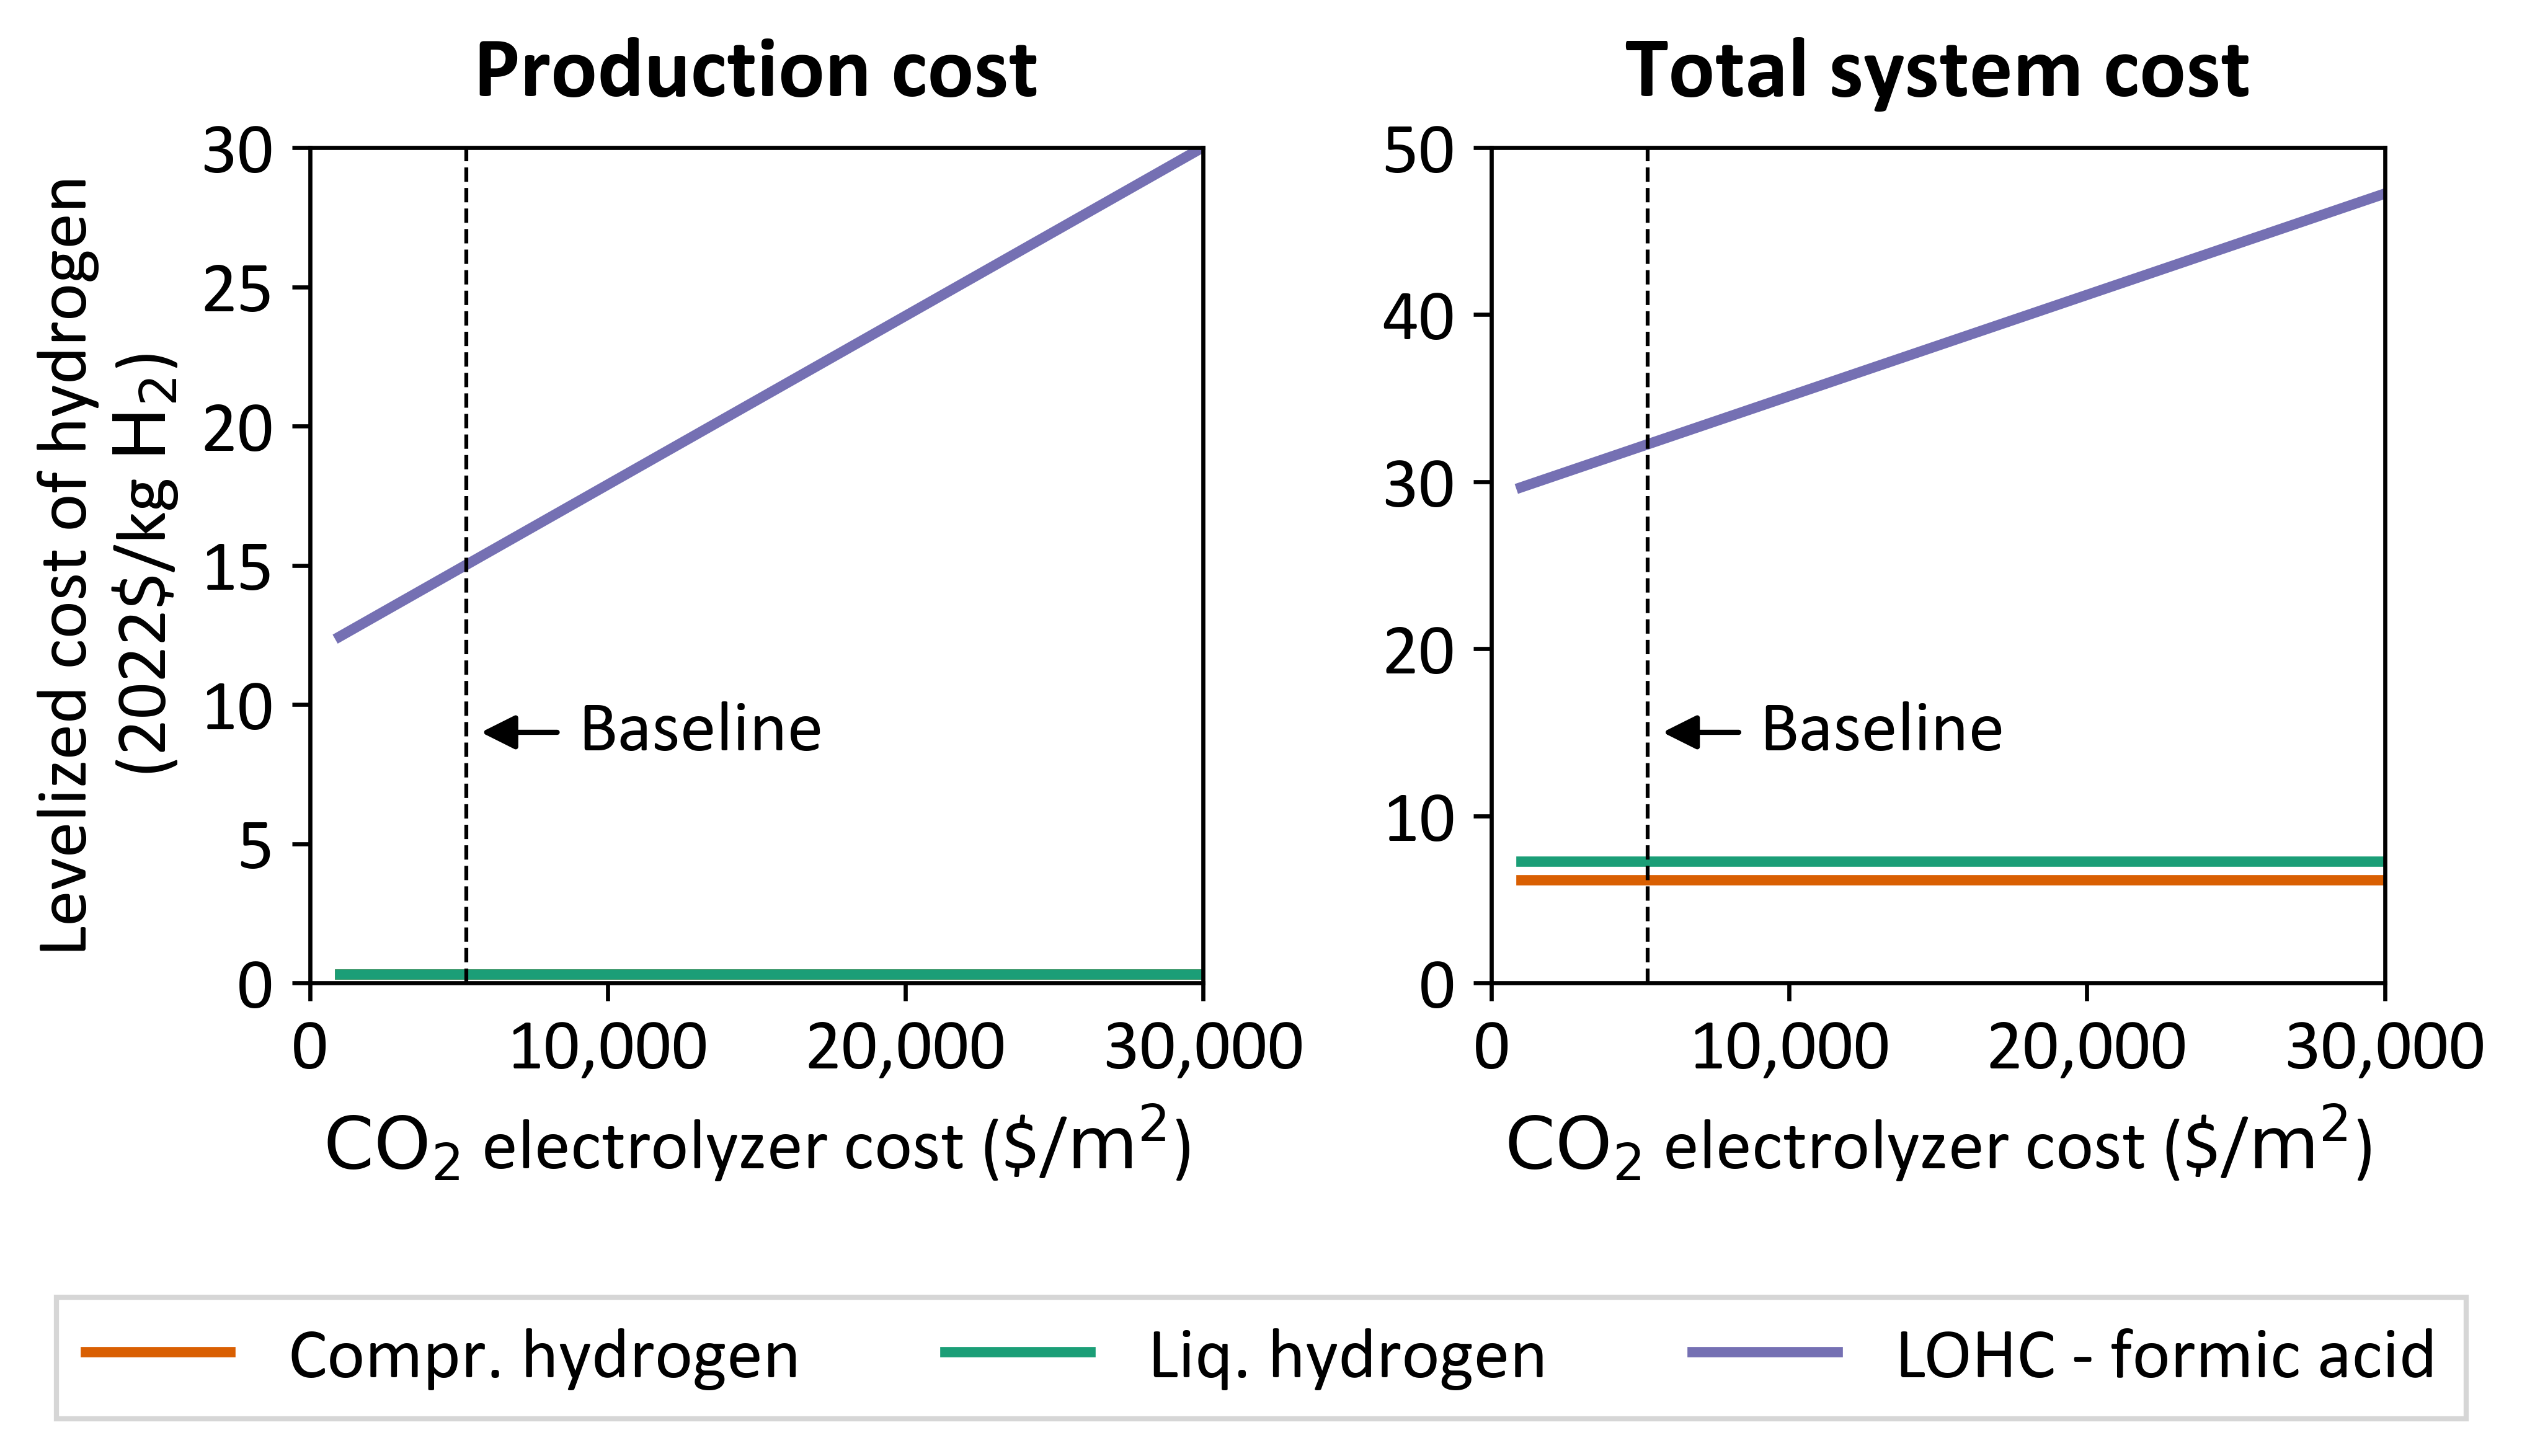

In [55]:
# create subplots
fig, axes = plt.subplots(
    figsize=(7, 3.5),
    ncols=2,
    layout='tight',
    dpi=600
    )

for pw, color in pw_colors.items():

    # plot hydrogen and LOHC costs
    df_prod[pw].plot(
        ax=axes[0],
        linewidth=2.0,
        color=color,
        xticks=np.arange(0, 1.0e5, 1.0e4),
        xlim=(0, 3.0e4),
        xlabel='${CO_2}$ electrolyzer cost (\$/${m^2}$)',
        ylabel='Levelized cost of hydrogen\n' + \
            '({:0.0f}\\$/kg'.format(output_dollar_year) + \
            ' ${H_2}$)',
        yticks=np.arange(0, 101, 5),
        ylim=(0, 30),
        )

    # plot total system costs
    df_tot[pw].plot(
        ax=axes[1],
        linewidth=2.0,
        color=color,
        xticks=np.arange(0, 1.0e5, 1.0e4),
        xlim=(0, 3.0e4),
        xlabel='${CO_2}$ electrolyzer cost (\$/${m^2}$)',
        yticks=np.arange(0, 101, 10),
        ylim=(0, 50),
        )

# update x-axis ticks
for ax in axes:
    ax.xaxis.set_major_formatter('{x:0,.0f}')

# add vertical lines and annotations for baseline input parameter
for ax in axes:
    ax.axvline(
        x=x_var_base,
        color='black',
        linewidth=0.75,
        linestyle='--',
    )

    ax.annotate(
        text='Baseline',
        xy=(0.18, 0.3),
        xytext=(0.3, 0.3),
        xycoords='axes fraction',
        ha='left',
        va='center',
        arrowprops=dict(
            arrowstyle='-|>',
            color='black',
        )
    )

# update subplot title
axes[0].set_title(
    'Production cost',
    pad=10,
    fontweight='bold',
)

axes[1].set_title(
    'Total system cost',
    pad=10,
    fontweight='bold',
)

# update legend for figure
handles, labels = axes[-1].get_legend_handles_labels()

fig.legend(
    handles=handles, 
    labels=labels, 
    # frameon=False,
    fancybox=False,
    bbox_to_anchor=(0.5, 0), 
    loc='upper center',
    ncols=3
    )

# save plot
plt.savefig(
    'total costs vs electrolyzer cost.svg',
    bbox_inches='tight'
    )

# show plot
plt.show()